# Objective

The file contains customer reviews from Amazon. The review title, body and rating is provided.

The objective is to build a NLP machine learning model that will predict the rating of reviews with maximum accuracy.
Also calculate the polarity of the reviews and compare with actual polarity obtained from the ratings.

## Approach
1. Model 1: Build a Naive Bayes model on original data to classify the ratings
2. Model 2: Build a Naive Bayes model with balanced data to classify the ratings
3. Model 3: Use Sentiment Intensity Analyser from NLTK VADER to calculate polarity
4. Model 4: Use positive and negative lexicons to calculate polarity

## Data Import and Validation

In [1]:
import pandas as pd

In [2]:
# reading the data file

reviews_data = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/amazon_reviews_NLP/20191226-reviews.csv")
print(reviews_data.shape)
reviews_data

(67986, 8)


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [3]:
# combining the title and body to a single text

text_col = reviews_data['title']+' '+reviews_data['body']
text_col

0        Def not best, but not worst I had the Samsung ...
1        Text Messaging Doesn't Work Due to a software ...
2        Love This Phone This is a great, reliable phon...
3        Love the Phone, BUT...! I love the phone and a...
4        Great phone service and options, lousy case! T...
                               ...                        
67981    Awesome Phone, but finger scanner is a big mis...
67982    Simply Amazing! I've been an Xperia user for s...
67983    great phon3, but many bugs need to fix. still ...
67984    Phone is like new Product looks and works like...
67985    Outstanding phone for the price I love the siz...
Length: 67986, dtype: object

In [4]:
# creating a new dataframe with only the required data

review_data1 = pd.DataFrame(zip(text_col, reviews_data['rating']), columns=['text_col','rating'])
review_data1

,text_col,rating
0,"Def not best, but not worst I had the Samsung ...",3
1,Text Messaging Doesn't Work Due to a software ...,1
2,"Love This Phone This is a great, reliable phon...",5
3,"Love the Phone, BUT...! I love the phone and a...",3
4,"Great phone service and options, lousy case! T...",4
...,...,...
67981,"Awesome Phone, but finger scanner is a big mis...",5
67982,Simply Amazing! I've been an Xperia user for s...,5
67983,"great phon3, but many bugs need to fix. still ...",5
67984,Phone is like new Product looks and works like...,5


In [5]:
# null check
review_data1['text_col'].isnull().value_counts()

False    67956
True        30
Name: text_col, dtype: int64

In [6]:
review_data1['rating'].isnull().value_counts()

False    67986
Name: rating, dtype: int64

In [7]:
# drop rows which have null values in text column

review_data1.dropna(subset=['text_col'], inplace=True)
review_data1['text_col'].isnull().value_counts()

False    67956
Name: text_col, dtype: int64

In [8]:
review_data1.reset_index(inplace=True, drop=True)
review_data1

,text_col,rating
0,"Def not best, but not worst I had the Samsung ...",3
1,Text Messaging Doesn't Work Due to a software ...,1
2,"Love This Phone This is a great, reliable phon...",5
3,"Love the Phone, BUT...! I love the phone and a...",3
4,"Great phone service and options, lousy case! T...",4
...,...,...
67951,"Awesome Phone, but finger scanner is a big mis...",5
67952,Simply Amazing! I've been an Xperia user for s...,5
67953,"great phon3, but many bugs need to fix. still ...",5
67954,Phone is like new Product looks and works like...,5


In [9]:
review_data1['rating'].value_counts()

5    37733
1    12738
4     8820
3     4752
2     3913
Name: rating, dtype: int64

In [10]:
# assigning polarity score (-1 to +1) based on rating

review_data1['score'] = (review_data1['rating'].astype('float') - 3)*0.5
review_data1

,text_col,rating,score
0,"Def not best, but not worst I had the Samsung ...",3,0.0
1,Text Messaging Doesn't Work Due to a software ...,1,-1.0
2,"Love This Phone This is a great, reliable phon...",5,1.0
3,"Love the Phone, BUT...! I love the phone and a...",3,0.0
4,"Great phone service and options, lousy case! T...",4,0.5
...,...,...,...
67951,"Awesome Phone, but finger scanner is a big mis...",5,1.0
67952,Simply Amazing! I've been an Xperia user for s...,5,1.0
67953,"great phon3, but many bugs need to fix. still ...",5,1.0
67954,Phone is like new Product looks and works like...,5,1.0


# MODEL 1 : Naive Bayes Classification Model
Model built on original unbalanced data

In [11]:
# import and install libraries

import numpy as np

#!pip install nltk
import nltk
#!pip install spacy
import spacy

#nltk.download("all")

## Text Preprocessing Function
1. Convert to lower case
2. Expand the short forms
3. Remove whitespaces, symbols, punctuations, weblinks, emails using regular expressions
4. Lemmatization
5. Remove stop words

In [12]:
# Dictionary for Expanded Forms
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring", "hrs":"hours"}

# Function to expand the short forms
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

# Updating stop words in spaCy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do", "m", "oh", "u", "ll", "ill", "amp", "ve", "phone", "samsung"})

# Function for Regular Expression based Cleaning
import re
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  x=re.sub(r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}', "", x) #Remove email addresses
  return(x)

spacy_model = spacy.load('en_core_web_sm')

#####  Single Function for Preprocessing  ####

def pre_processing(input_data, text_col):
  # Convert all letters to lower case  
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  # Split sentence to words. Expand abbreviated forms
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  # remove the stopwords
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  # Regular expression cleaning
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  # Lemmatization
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  # remove stopwords created from lemmatization
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  # rejoin the remaining words to make a document
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  # Final Output after Pre-processing
  print(input_data[[text_col,"text_col_clean"]])

In [13]:
pre_processing(input_data=review_data1, text_col="text_col")

                                                text_col  \
0      Def not best, but not worst I had the Samsung ...   
1      Text Messaging Doesn't Work Due to a software ...   
2      Love This Phone This is a great, reliable phon...   
3      Love the Phone, BUT...! I love the phone and a...   
4      Great phone service and options, lousy case! T...   
...                                                  ...   
67951  Awesome Phone, but finger scanner is a big mis...   
67952  Simply Amazing! I've been an Xperia user for s...   
67953  great phon3, but many bugs need to fix. still ...   
67954  Phone is like new Product looks and works like...   
67955  Outstanding phone for the price I love the siz...   

                                          text_col_clean  
0      def bad awhile absolute doo doo read review de...  
1      text messaging work software issue nokia sprin...  
2      love great reliable purchase die menu easily c...  
3      love love expect price bill receive 

In [14]:
# text after preprocessing
review_data1

,text_col,rating,score,text_col_clean
0,"Def not best, but not worst I had the Samsung ...",3,0.0,def bad awhile absolute doo doo read review de...
1,Text Messaging Doesn't Work Due to a software ...,1,-1.0,text messaging work software issue nokia sprin...
2,"Love This Phone This is a great, reliable phon...",5,1.0,love great reliable purchase die menu easily c...
3,"Love the Phone, BUT...! I love the phone and a...",3,0.0,love love expect price bill receive I little m...
4,"Great phone service and options, lousy case! T...",4,0.5,great service option lousy case great purpose ...
...,...,...,...,...
67951,"Awesome Phone, but finger scanner is a big mis...",5,1.0,awesome finger scanner big miss love camera sc...
67952,Simply Amazing! I've been an Xperia user for s...,5,1.0,simply amazing I xperia user year sony come lo...
67953,"great phon3, but many bugs need to fix. still ...",5,1.0,great phon bug fix wait update buy cousin
67954,Phone is like new Product looks and works like...,5,1.0,new product look work new recommend


In [16]:
# Word Cloud to identify the most frequently occuring words

# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

final_text= "".join(review_data1["text_col_clean"])
print(len(final_text))

10555315


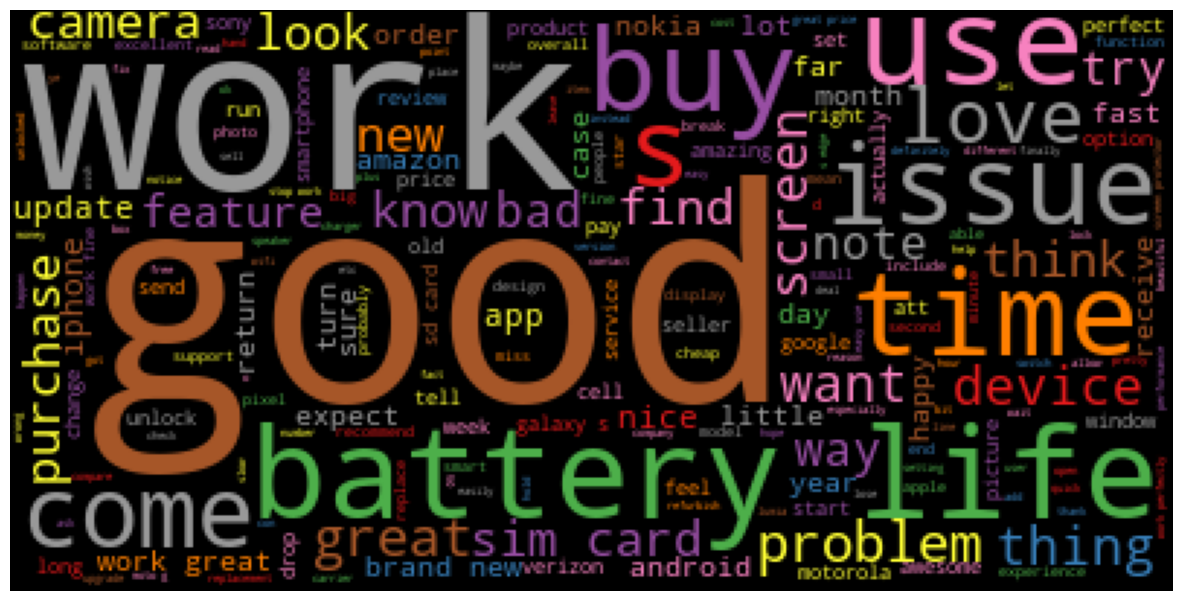

In [17]:
plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set1').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

Some stop words that can be added = phone, samsung

In [15]:
review_data1

,text_col,rating,score,text_col_clean
0,"Def not best, but not worst I had the Samsung ...",3,0.0,def bad awhile absolute doo doo read review de...
1,Text Messaging Doesn't Work Due to a software ...,1,-1.0,text messaging work software issue nokia sprin...
2,"Love This Phone This is a great, reliable phon...",5,1.0,love great reliable purchase die menu easily c...
3,"Love the Phone, BUT...! I love the phone and a...",3,0.0,love love expect price bill receive I little m...
4,"Great phone service and options, lousy case! T...",4,0.5,great service option lousy case great purpose ...
...,...,...,...,...
67951,"Awesome Phone, but finger scanner is a big mis...",5,1.0,awesome finger scanner big miss love camera sc...
67952,Simply Amazing! I've been an Xperia user for s...,5,1.0,simply amazing I xperia user year sony come lo...
67953,"great phon3, but many bugs need to fix. still ...",5,1.0,great phon bug fix wait update buy cousin
67954,Phone is like new Product looks and works like...,5,1.0,new product look work new recommend


## Creating a Document Term Matrix

The words are selected based on frequency of occurence. The higher the frequency, the less words will be selected. If the number of words selected is more then accordingly the size of DTM will increase.

If there are any missing values in the cleaned column, we need to drop the missing values before creating DTM.

In [20]:
# Checking for null
review_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67956 entries, 0 to 67955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text_col        67956 non-null  object 
 1   rating          67956 non-null  int64  
 2   score           67956 non-null  float64
 3   text_col_clean  67956 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df = 8) # freq = 8, words = 6649
dtm_v1 = pd.DataFrame(countvec1.fit_transform(review_data1['text_col_clean']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1

(67956, 6649)


,aaa,abandon,abe,ability,able,abominable,abroad,absence,absent,absolute,...,zmax,zombie,zone,zoom,zooming,zte,zune,él,único,útil
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Naive Bayes Model

In [22]:
# adding the target column rating to DTM

dtm_v1['rating'] = review_data1['rating'] # index-wise copy
dtm_v1['rating'].value_counts()

5    37733
1    12738
4     8820
3     4752
2     3913
Name: rating, dtype: int64

In [23]:
# Null Check
dtm_v1['rating'].isnull().sum().sum()

0

In [24]:
# Preparing train and test data

from sklearn.model_selection import train_test_split

X = dtm_v1.drop(['rating'], axis = 1)
y = dtm_v1['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54364, 6648)
(54364,)
(13592, 6648)
(13592,)


In [25]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()

# Fitting model to our data
senti_model.fit(X_train, y_train)

MultinomialNB()

## Model Validation

In [26]:
# Model Accuracy
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.7156206313001251
Test Accuracy 0.681577398469688


In [27]:
# Prediction on test data
pred_rating=senti_model.predict(X_test)
print(pred_rating)

[5 2 5 ... 5 5 1]


In [28]:
print("Actual values \n", pd.Series(y_test).value_counts())
print("Predicted values \n", pd.Series(pred_rating).value_counts())

Actual values 
 5    7527
1    2563
4    1778
3     899
2     825
Name: rating, dtype: int64
Predicted values 
 5    8681
1    2963
4     878
3     555
2     515
dtype: int64


In [29]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,pred_rating)

labels = np.unique(y_test)
cm1=pd.DataFrame(cm1, index=labels, columns=labels)
cm1

,1,2,3,4,5
1,1924,187,81,43,328
2,394,148,88,46,149
3,254,83,142,124,296
4,164,55,127,287,1145
5,227,42,117,378,6763


In [30]:
# Confusion Matrix in percentage
percent_cm = cm1/cm1.sum(axis=1)[:,None]
round(percent_cm, 2)

/var/folders/ll/4wnpdmz51wd0zcwwkxvyvr180000gn/T/ipykernel_789/371013559.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percent_cm = cm1/cm1.sum(axis=1)[:,None]


,1,2,3,4,5
1,0.75,0.07,0.03,0.02,0.13
2,0.48,0.18,0.11,0.06,0.18
3,0.28,0.09,0.16,0.14,0.33
4,0.09,0.03,0.07,0.16,0.64
5,0.03,0.01,0.02,0.05,0.90


Class 1 accuracy = 0.75,
Class 2 accuracy = 0.18,
Class 3 accuracy = 0.16,
Class 4 accuracy = 0.16,
Class 5 accuracy = 0.90

We can see that the class-wise accuracy is low for classes 2, 3 and 4 which is 0.18, 0.16 and 0.16 respectively.
This is due to class imbalance. Frequency of classes 2, 3 and 4 is very low compared to classes 1 and 5.
We need to handle the imbalance to get better class wise accuracy

# Handling class imbalance
Oversampling of minority class and undersampling of majority class

In [15]:
# Split original data into train and test

from sklearn.model_selection import train_test_split

X_data = review_data1.drop(['rating'], axis=1)
y_data = review_data1['rating']

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 10)
print(X_d_train.shape)
print(y_d_train.shape)
print(X_d_test.shape)
print(y_d_test.shape)

# Checking if the new test data has the same index (records) as the previous test data
# print(X_test.index)
print(X_d_test.index)
# yes it does have the same records since the random_state in split is same in both cases

# I want to use the same records from previous model as the test dataset, because the accuracy can vary a lot if the records are different.
# Different records have very different sets of words in the document.
# Hence, if we use different test datasets, the accuracy of the models will not be comparable

(54364, 3)
(54364,)
(13592, 3)
(13592,)
Int64Index([41475, 48643, 11384, 47382, 53133, 20010, 61242, 27245,  6097,
            37263,
            ...
            23618, 64564, 34622, 16701, 26428, 25841, 20482, 20777, 50184,
            16804],
           dtype='int64', length=13592)


In [16]:
# Getting the full train dataset
train_data = pd.concat([X_d_train, y_d_train], axis=1)
print(train_data.shape)

(54364, 4)


In [17]:
# Splitting data by target variable classes 1, 2, 3, 4, 5

train_class1 = train_data[train_data['rating'] == 1]
train_class2 = train_data[train_data['rating'] == 2]
train_class3 = train_data[train_data['rating'] == 3]
train_class4 = train_data[train_data['rating'] == 4]
train_class5 = train_data[train_data['rating'] == 5]

print(train_class1.shape)
print(train_class2.shape)
print(train_class3.shape)
print(train_class4.shape)
print(train_class5.shape)

(10175, 4)
(3088, 4)
(3853, 4)
(7042, 4)
(30206, 4)


In [18]:
# Let's keep the record count of each class around 5000.
# Taking higher record counts is causing the RAM to crash when running the model

## Undersampling of class 1 : Decrease to 0.50x
class1_under = train_class1.sample(int(0.5*len(train_class1)), replace=True)

## Oversampling of class 2 : Increase 1.5x
class2_over = train_class2.sample(int(1.5*len(train_class2)), replace=True)

## Oversampling of class 3 : Increase 1.25x
class3_over = train_class3.sample(int(1.25*len(train_class3)), replace=True)

## Undersampling of class 4 : Decrease to 0.70x
class4_over = train_class4.sample(int(0.70*len(train_class4)), replace=True)

## Undersampling of class 5 : Decrease to 0.20x
class5_under = train_class5.sample(int(0.2*len(train_class5)), replace=True)

In [19]:
# Concatenate all the classes
review_bal = pd.concat([class1_under, class2_over, class3_over, class4_over, class5_under])

print("Balanced Data : ", review_bal.shape)
print(review_bal['rating'].value_counts())

Balanced Data :  (25505, 4)
5    6041
1    5087
4    4929
3    4816
2    4632
Name: rating, dtype: int64


# MODEL 2 : Naiye Bayes Model
With balanced train data

To get the words of the test dataset into the Document Term Matrix, we have to add the test data to the train data.
After creating the DTM, we can again separate out train and test before building the model

In [20]:
# add a train, test label for easy identification of train and test data after creating DTM
review_bal['label'] = 'train'

test_data = pd.concat([X_d_test, y_d_test], axis=1)
test_data['label'] = 'test'

# Append train and test data
review_data2 = pd.concat([review_bal,test_data], axis=0, ignore_index=True)
review_data2

,text_col,score,text_col_clean,rating,label
0,This POS phone is a big waste of money and not...,-1.0,pos big waste money worth buy liar claim unloc...,1,train
1,The reception on this phone makes it worthless...,-1.0,reception worthless bad investment lifenot jok...,1,train
2,Product not as promised The product was defect...,-1.0,product promise product defective battery dama...,1,train
3,Purchased from MyWit. Be VERY cautious about b...,-1.0,purchase mywit cautious buying themi purchase ...,1,train
4,Foto de la oferta y descripción técnica no coi...,-1.0,foto de la oferta y descripción técnica coinci...,1,train
...,...,...,...,...,...
39092,Most beautiful Sony Xperia flagship Great smar...,1.0,beautiful sony xperia flagship great smartphon...,5,test
39093,Would buy again! This phone is great. Takes re...,1.0,buy great nice picture battery life good day s...,5,test
39094,Gold phones are cheaper because nobody cool wa...,1.0,gold cheap cool want battery drain kinda fast ...,5,test
39095,Samsung Galaxy Note 9 Samsung Galaxy Note 9 I ...,1.0,galaxy note galaxy note love excellent,5,test


In [21]:
# Keeping the train and test data index for splitting later

index_train = review_data2[review_data2['label']=='train'].index
index_train
index_test = review_data2[review_data2['label']=='test'].index
index_test

Int64Index([25505, 25506, 25507, 25508, 25509, 25510, 25511, 25512, 25513,
            25514,
            ...
            39087, 39088, 39089, 39090, 39091, 39092, 39093, 39094, 39095,
            39096],
           dtype='int64', length=13592)

## Creating a Document Term Matrix

In [22]:
# Checking for null
review_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39097 entries, 0 to 39096
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text_col        39097 non-null  object 
 1   score           39097 non-null  float64
 2   text_col_clean  39097 non-null  object 
 3   rating          39097 non-null  int64  
 4   label           39097 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df = 15) # freq = 8, words = 5245
dtm_v1 = pd.DataFrame(countvec1.fit_transform(review_data2['text_col_clean']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1

(39097, 3637)


,abandon,ability,able,abroad,absolute,absolutely,absurd,abuse,abysmal,ac,...,youtube,yr,yrs,zenfone,zero,zone,zoom,zte,zune,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Naive Bayes Model

In [24]:
# adding the target column rating to DTM

dtm_v1['rating'] = review_data2['rating'] # index-wise copy
dtm_v1['rating'].value_counts()

5    13568
1     7650
4     6707
3     5715
2     5457
Name: rating, dtype: int64

In [25]:
# Null Check
dtm_v1['rating'].isnull().sum().sum()

0

In [26]:
# Preparing train and test data
# Get train and test data using index

train_dtmv2 = dtm_v1.iloc[index_train]
test_dtmv2 = dtm_v1.iloc[index_test]
train_dtmv2
test_dtmv2

,abandon,ability,able,abroad,absolute,absolutely,absurd,abuse,abysmal,ac,...,youtube,yr,yrs,zenfone,zero,zone,zoom,zte,zune,único
25505,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train = train_dtmv2.drop(['rating'], axis=1)
y_train = train_dtmv2['rating']

X_test = test_dtmv2.drop(['rating'], axis=1)
y_test = test_dtmv2['rating']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25505, 3636)
(25505,)
(13592, 3636)
(13592,)


In [30]:
# delete variables which are not required to free up RAM
del train_dtmv2, test_dtmv2, dtm_v1, train_class1, train_class2, train_class3, train_class4, train_class5
del review_bal, train_class1, class2_over, class3_over, class4_over, class5_under
del train_data, test_data

In [31]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
senti_model2 = MultinomialNB()

# Fitting model to our train data
senti_model2.fit(X_train, y_train)

MultinomialNB()

## Model Validation

In [32]:
# Model Accuracy
print("Train Accuracy", senti_model2.score(X_train,y_train))
print("Test Accuracy", senti_model2.score(X_test,y_test))

Train Accuracy 0.5411880023524799
Test Accuracy 0.6539140670982931


In [33]:
# Prediction on test data
pred_rating=senti_model2.predict(X_test)
print(pred_rating)

[5 2 5 ... 5 5 1]


In [34]:
print("Actual values \n", pd.Series(y_test).value_counts())
print("Predicted values \n", pd.Series(pred_rating).value_counts())

Actual values 
 5    7527
1    2563
4    1778
3     899
2     825
Name: rating, dtype: int64
Predicted values 
 5    8042
1    2773
3    1681
2    1096
dtype: int64


In [35]:
pred_rating2=senti_model2.predict(X_train)
print("Actual values \n", pd.Series(y_train).value_counts())
print("Predicted values \n", pd.Series(pred_rating2).value_counts())

Actual values 
 5    6041
1    5087
4    4929
3    4816
2    4632
Name: rating, dtype: int64
Predicted values 
 5    10111
1     6837
3     4959
2     3596
4        2
dtype: int64


In [36]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test,pred_rating)

labels = np.unique(y_test)
cm2=pd.DataFrame(cm2, index=labels, columns=labels)
cm2

,1,2,3,4,5
1,1772,393,219,0,179
2,317,243,183,0,82
3,207,182,334,0,176
4,148,128,436,0,1066
5,329,150,509,0,6539


## Findings

We have some very interesting findings. 

1. Handling class imbalance through oversampling and undersampling has completely distorted the predictions. Class 1 and 4 are missing from test predictions. And, they are almost missing from train data predictions.
2. First time we ran the model, only class 4 was missing. So, predictions might be inconsistent. Anyway, we cannot use the model if an entire class is missing.

## Conclusion
Do NOT go for handling class imbalance in Sentiment analysis by oversampling and undersampling


Most probably the RAM is crashing and one of the classes is not getting predicted correctly.

# MODEL 3 : Sentiment Intensity Analyser from NLTK VADER
Use on unprocessed and unbalanced data.

In [37]:
review_data1

,text_col,rating,score,text_col_clean
0,"Def not best, but not worst I had the Samsung ...",3,0.0,def bad awhile absolute doo doo read review de...
1,Text Messaging Doesn't Work Due to a software ...,1,-1.0,text messaging work software issue nokia sprin...
2,"Love This Phone This is a great, reliable phon...",5,1.0,love great reliable purchase die menu easily c...
3,"Love the Phone, BUT...! I love the phone and a...",3,0.0,love love expect price bill receive I little m...
4,"Great phone service and options, lousy case! T...",4,0.5,great service option lousy case great purpose ...
...,...,...,...,...
67951,"Awesome Phone, but finger scanner is a big mis...",5,1.0,awesome finger scanner big miss love camera sc...
67952,Simply Amazing! I've been an Xperia user for s...,5,1.0,simply amazing I xperia user year sony come lo...
67953,"great phon3, but many bugs need to fix. still ...",5,1.0,great phon bug fix wait update buy cousin
67954,Phone is like new Product looks and works like...,5,1.0,new product look work new recommend


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

polarity = [round(sia.polarity_scores(i)['compound'], 2) for i in review_data1['text_col']]

VADER = Valence Aware Dictionary and Sentiment Reasoner. It is tool attuned for sentiment analysis of social media data.

Compound is one of the arguments that gives a score between -1 and +1. Others are positive, negative and neutral. They give a sentence is what percent postive, what percent negative and what percent neutral. Here we are only interested in the compound score as it combines the other three parameters to give a polarity score.

In [39]:
review_data1['vader_score'] = polarity
review_data1.head(10)

,text_col,rating,score,text_col_clean,vader_score
0,"Def not best, but not worst I had the Samsung ...",3,0.0,def bad awhile absolute doo doo read review de...,0.86
1,Text Messaging Doesn't Work Due to a software ...,1,-1.0,text messaging work software issue nokia sprin...,0.89
2,"Love This Phone This is a great, reliable phon...",5,1.0,love great reliable purchase die menu easily c...,0.87
3,"Love the Phone, BUT...! I love the phone and a...",3,0.0,love love expect price bill receive I little m...,0.97
4,"Great phone service and options, lousy case! T...",4,0.5,great service option lousy case great purpose ...,0.81
5,"Worked great for me Hello, I have this phone a...",4,0.5,work great hello decide buy flip problem batte...,0.87
6,Wanna cool Nokia? You have it here! Cool. Chea...,5,1.0,wanna cool nokia cool cheap color word describ...,0.98
7,Problem with 3588i universal headset The 3599i...,4,0.5,problem I universal headset I overall nice nok...,0.42
8,cool phone!!!!!!!! I've never owned a Nokia ph...,5,1.0,cool I nokia I alot reception greateven signal...,0.94
9,Pissed off-a little bit ok well im in school a...,3,0.0,piss offa little bit ok I school text message ...,-0.11


In [41]:
review_data1['vader_score'].max() # +1.0
review_data1['vader_score'].min() # -1.0

-1.0

# MODEL 4 : Using Positive and Negative Lexicons
Used with unbalanced preprocessed text.

The opinion lexicons are taken from http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html . 
The files contains a list of positive and negative opinion words (or sentiment words). Some words are intentionally misspelled because those misspelled words appear in social media texts frequently.


In [42]:
# convert preprocessed sentence to list of words

review_data3 = review_data1.drop(['text_col','rating'], axis=1)
review_data3['preprocess_list'] = review_data3['text_col_clean'].map(lambda x : str(x).split())
review_data3['total_len'] = review_data3['preprocess_list'].map(lambda x: len(x))
review_data3

,score,text_col_clean,vader_score,preprocess_list,total_len
0,0.0,def bad awhile absolute doo doo read review de...,0.86,"[def, bad, awhile, absolute, doo, doo, read, r...",130
1,-1.0,text messaging work software issue nokia sprin...,0.89,"[text, messaging, work, software, issue, nokia...",60
2,1.0,love great reliable purchase die menu easily c...,0.87,"[love, great, reliable, purchase, die, menu, e...",52
3,0.0,love love expect price bill receive I little m...,0.97,"[love, love, expect, price, bill, receive, I, ...",26
4,0.5,great service option lousy case great purpose ...,0.81,"[great, service, option, lousy, case, great, p...",39
...,...,...,...,...,...
67951,1.0,awesome finger scanner big miss love camera sc...,0.95,"[awesome, finger, scanner, big, miss, love, ca...",49
67952,1.0,simply amazing I xperia user year sony come lo...,0.87,"[simply, amazing, I, xperia, user, year, sony,...",47
67953,1.0,great phon bug fix wait update buy cousin,0.37,"[great, phon, bug, fix, wait, update, buy, cou...",8
67954,1.0,new product look work new recommend,0.78,"[new, product, look, work, new, recommend]",6


In [43]:
review_data3.drop(['text_col_clean'], axis=1, inplace=True)

In [63]:
# getting count of positve and negative words from stanard reference documents

file = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/nlp_lexicon/positive-words.txt", header=None)
pos_words = list(file[0])

file = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/nlp_lexicon/negative-words.txt", header=None, encoding='latin-1')
neg_words = list(file[0])
# there are some special characters in negative words file. 
# So we have specified the encoding as latin-1 which accomodates the special characters


In [64]:
# file = open('negative-words.txt', 'r')
# neg_words = file.read().split()
# file = open('positive-words.txt', 'r')
# pos_words = file.read().split()

In [66]:
num_pos = review_data3['preprocess_list'].map(lambda x: len([i for i in x if i in pos_words]))
review_data3['pos_count'] = num_pos
num_neg = review_data3['preprocess_list'].map(lambda x: len([i for i in x if i in neg_words]))
review_data3['neg_count'] = num_neg

review_data3

,score,vader_score,preprocess_list,total_len,pos_count,neg_count
0,0.0,0.86,"[def, bad, awhile, absolute, doo, doo, read, r...",130,15,19
1,-1.0,0.89,"[text, messaging, work, software, issue, nokia...",60,8,3
2,1.0,0.87,"[love, great, reliable, purchase, die, menu, e...",52,10,4
3,0.0,0.97,"[love, love, expect, price, bill, receive, I, ...",26,4,0
4,0.5,0.81,"[great, service, option, lousy, case, great, p...",39,5,4
...,...,...,...,...,...,...
67951,1.0,0.95,"[awesome, finger, scanner, big, miss, love, ca...",49,8,6
67952,1.0,0.87,"[simply, amazing, I, xperia, user, year, sony,...",47,4,1
67953,1.0,0.37,"[great, phon, bug, fix, wait, update, buy, cou...",8,1,1
67954,1.0,0.78,"[new, product, look, work, new, recommend]",6,2,0


In [67]:
# Should not keep denominator as 0. Change total_len=1 where total_len=0
# Check for 0

review_data3[review_data3['total_len']==0]

,score,vader_score,preprocess_list,total_len,pos_count,neg_count
7553,1.0,0.00,[],0,0,0
7667,0.0,0.70,[],0,0,0
13911,-1.0,0.00,[],0,0,0
16697,-1.0,0.00,[],0,0,0
17511,1.0,0.68,[],0,0,0
...,...,...,...,...,...,...
66412,1.0,0.36,[],0,0,0
66429,1.0,0.00,[],0,0,0
66716,1.0,0.00,[],0,0,0
66751,0.5,0.08,[],0,0,0


In [68]:
# Replace 0 with 1
review_data3['total_len'] = review_data3['total_len'].replace(0,1)
review_data3[review_data3['total_len']==0]

,score,vader_score,preprocess_list,total_len,pos_count,neg_count


In [69]:
review_data3['sentiment_score2'] = round((review_data3['pos_count'] - review_data3['neg_count']) / review_data3['total_len'], 2)
review_data3

,score,vader_score,preprocess_list,total_len,pos_count,neg_count,sentiment_score2
0,0.0,0.86,"[def, bad, awhile, absolute, doo, doo, read, r...",130,15,19,-0.03
1,-1.0,0.89,"[text, messaging, work, software, issue, nokia...",60,8,3,0.08
2,1.0,0.87,"[love, great, reliable, purchase, die, menu, e...",52,10,4,0.12
3,0.0,0.97,"[love, love, expect, price, bill, receive, I, ...",26,4,0,0.15
4,0.5,0.81,"[great, service, option, lousy, case, great, p...",39,5,4,0.03
...,...,...,...,...,...,...,...
67951,1.0,0.95,"[awesome, finger, scanner, big, miss, love, ca...",49,8,6,0.04
67952,1.0,0.87,"[simply, amazing, I, xperia, user, year, sony,...",47,4,1,0.06
67953,1.0,0.37,"[great, phon, bug, fix, wait, update, buy, cou...",8,1,1,0.00
67954,1.0,0.78,"[new, product, look, work, new, recommend]",6,2,0,0.33


As the total number of words per document is quite large, sentiment score is low. We should add more stop words to reduce the number of words per document. That way, sentiment_score2 would increase.

## Sentiment score adjustment
Since there are too many neutral words, let us consider the sum of positive and negative words as total words. Also, if the sum is 0, then we set the default value =1.

In [72]:
review_data3['eff_len'] = review_data3['pos_count'] + review_data3['neg_count']
review_data3['eff_len'][review_data3['eff_len']==0]=1

/var/folders/ll/4wnpdmz51wd0zcwwkxvyvr180000gn/T/ipykernel_1173/2359822679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data3['eff_len'][review_data3['eff_len']==0]=1


In [73]:
review_data3['senti_score3'] = round((review_data3['pos_count'] - review_data3['neg_count'])/review_data3['eff_len'] ,2)
review_data3

,score,vader_score,preprocess_list,total_len,pos_count,neg_count,sentiment_score2,eff_len,senti_score3
0,0.0,0.86,"[def, bad, awhile, absolute, doo, doo, read, r...",130,15,19,-0.03,34,-0.12
1,-1.0,0.89,"[text, messaging, work, software, issue, nokia...",60,8,3,0.08,11,0.45
2,1.0,0.87,"[love, great, reliable, purchase, die, menu, e...",52,10,4,0.12,14,0.43
3,0.0,0.97,"[love, love, expect, price, bill, receive, I, ...",26,4,0,0.15,4,1.00
4,0.5,0.81,"[great, service, option, lousy, case, great, p...",39,5,4,0.03,9,0.11
...,...,...,...,...,...,...,...,...,...
67951,1.0,0.95,"[awesome, finger, scanner, big, miss, love, ca...",49,8,6,0.04,14,0.14
67952,1.0,0.87,"[simply, amazing, I, xperia, user, year, sony,...",47,4,1,0.06,5,0.60
67953,1.0,0.37,"[great, phon, bug, fix, wait, update, buy, cou...",8,1,1,0.00,2,0.00
67954,1.0,0.78,"[new, product, look, work, new, recommend]",6,2,0,0.33,2,1.00


# Finding the Best Fit Model using R-Square
Let's find the best fit model by using vader_score, sentiment_score2 and senti_score3 and calculating R-Square value for each of them.

In [90]:
# function to get R-Squared value using OLS method

def get_rsqr(input_data, actual_score, pred_score):
    actual = input_data[actual_score]
    pred = input_data[pred_score]
    ssr = 0
    sse = 0
    
    for i in range(len(actual)):
        act_sqr = pow(actual[i],2)
        res_sqr = pow((actual[i]-pred[i]),2)
        ssr = ssr+round(act_sqr,3)
        sse = sse+round(res_sqr,3)
    
    sst = ssr+sse
    if sst==0:
        sst=1
    rsqr = round(ssr/sst, 3)
    return(rsqr)

In [93]:
rsqr_m1 = get_rsqr(input_data = review_data3, actual_score = 'score', pred_score = 'vader_score')
print("R-squared value for NLTK Vader = ", rsqr_m1)

rsqr_m2 = get_rsqr(input_data = review_data3, actual_score = 'score', pred_score = 'sentiment_score2')
print("R-squared value for Model 4 using total words of the document = ", rsqr_m2)

rsqr_m3 = get_rsqr(input_data = review_data3, actual_score = 'score', pred_score = 'senti_score3')
print("R-squared value for Model 4 using sum of positive and negative words as total words = ", rsqr_m3)

R-squared value for NLTK Vader =  0.672
R-squared value for Model 4 using total words of the document =  0.592
R-squared value for Model 4 using sum of positive and negative words as total words =  0.63


## Result

NLTK VADER method of finding polarity and conducting sentiment analysis is the best fit model for this data.